# EDA dataset using json files pre- and post-disaster containing building polygons and damage level per building.

### Useful Links

**Check json in advance visually**   
 [View "intended" JSON](https://xml-json.kwebpia.net/?state=%7B%22ids%22:%5B%221Mj2srr9nVnj3_-BP2WkWkBdD3PH5qwKe%22%5D,%22action%22:%22open%22,%22resourceKeys%22:%7B%7D%7D)  
  
**Check JSON as table with converter**   
 [Online converter JSON to CSV/Excel](https://www.convertcsv.com/json-to-csv.htm)

In the following we read all post-disaster JSON files from the specified folder and create a DataFrame where each building becomes a row in the DataFrame, and each key-value pair in the JSON file becomes a column in the DataFrame.

In [66]:
# load libraries
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# THIS FUNCTION READS ONLY THE POST-DISASTER FILES and include more than 1 path (train, test...)
# this function creates a dataframe with each column being a building 
#the dataframe contains all the buildings of all the files in all folders specified in folder_path_list 


def json_to_dataframe_with_metadata_by_building(folder_path_list):
    '''
    This function converts json files that carry the class labels into
    data frame and at the same time decodes the json column into individual columns
    including the metadata.
    Args:
        folder_path_list (~list): A list with path to directories where json files are stored
        
    Returns:
        df (~pandas.dataframe): each row corresponds to one building. Different information contained in json file is stored in 
        the different columns of this dataframe.
        
        images_no_buildings (~ list): list of image names with no buildings annotations associated.
    '''
    data = []
    metadata_columns = []  # List to store metadata for each file
    images_no_buildings = [] 
    for folder_path in folder_path_list:
        for filename in os.listdir(folder_path):
            if filename.endswith(".json") and "post_disaster" in filename:
                image_name=filename.split(".")[0]+".png"
                file_path = os.path.join(folder_path, filename)
                with open(file_path, "r") as file:
                    json_data = json.load(file)

                    # Extract metadata from the JSON file
                    metadata = json_data.get("metadata", {})  # Replace "metadata" with the correct key name for metadata
                    metadata_prefixed = {f"metadata_{key}": value for key, value in metadata.items()}
                    metadata_columns.append(metadata_prefixed)  # Append metadata to the list

                    # Append "lng_lat" data to the data list
                    lng_lat = json_data["features"]["lng_lat"]
                    if lng_lat:
                        for item in lng_lat:
                            properties_prefixed = {f"properties_{key}": value for key, value in item["properties"].items()}
                            item.update(metadata_prefixed)  # Add metadata to each "lng_lat" item
                            item.update(properties_prefixed)  # Add properties with prefix to each "lng_lat" item
                            
                            data.append(item)
                    else:
                        # saving image names associated to json files with no building annotations
                        images_no_buildings.append(image_name)


                    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    return df,images_no_buildings



In [68]:
# small function to count the files in a folder
def count_files_in_folder(folder_path):
    file_count = 0
    for _, _, files in os.walk(folder_path):
        file_count += len(files)
    return file_count

In [69]:
# path to xView2 challenge data. the file train contains 2 folders: images and labels. 
#Images contains png satellite images pre- and post-disaster
#labels contains json files pre- and post-disaster 

# path to json files 
folder_path_train = "../data/last_subset/train/labels"

# creating dataframe and list with image names with no building annotations.
df_json_withmeta_by_building,images_no_buildings = json_to_dataframe_with_metadata_by_building([folder_path_train])

df = df_json_withmeta_by_building.copy()

In [70]:
print("images with no building annotations: ",len(images_no_buildings))

images with no building annotations:  326


In [71]:
df.columns

Index(['properties', 'wkt', 'metadata_sensor', 'metadata_provider_asset_type',
       'metadata_gsd', 'metadata_capture_date', 'metadata_off_nadir_angle',
       'metadata_pan_resolution', 'metadata_sun_azimuth',
       'metadata_sun_elevation', 'metadata_target_azimuth',
       'metadata_disaster', 'metadata_disaster_type', 'metadata_catalog_id',
       'metadata_original_width', 'metadata_original_height', 'metadata_width',
       'metadata_height', 'metadata_id', 'metadata_img_name',
       'properties_feature_type', 'properties_subtype', 'properties_uid'],
      dtype='object')

In [72]:
# all disaster names contained in this dataset
df["metadata_disaster"].unique()

array(['midwest-flooding', 'santa-rosa-wildfire', 'mexico-earthquake',
       'hurricane-matthew', 'socal-fire', 'hurricane-michael',
       'hurricane-florence', 'hurricane-harvey', 'guatemala-volcano',
       'palu-tsunami'], dtype=object)

In [73]:
# looking at one particular disaster (socal-fire) and its information per building
df[df["metadata_disaster"] == "socal-fire"].head()

,properties,wkt,metadata_sensor,metadata_provider_asset_type,metadata_gsd,metadata_capture_date,metadata_off_nadir_angle,metadata_pan_resolution,metadata_sun_azimuth,metadata_sun_elevation,...,metadata_catalog_id,metadata_original_width,metadata_original_height,metadata_width,metadata_height,metadata_id,metadata_img_name,properties_feature_type,properties_subtype,properties_uid
291,"{'feature_type': 'building', 'subtype': 'no-da...",POLYGON ((-118.7210512208106 34.11601785960978...,WORLDVIEW02,WORLDVIEW02,2.570075,2018-11-14T18:42:58.000Z,32.6742,0.643838,163.31218,35.885086,...,103001008513F200,1024,1024,1024,1024,MjU4MDk1OQ.HXy_9lOcouyMO5bfyV6xGrEFSyQ,socal-fire_00001292_post_disaster.png,building,no-damage,eee86ea4-d5f0-4136-8c50-ac68fb76c88c
292,"{'feature_type': 'building', 'subtype': 'no-da...",POLYGON ((-118.7205957356535 34.11634024476129...,WORLDVIEW02,WORLDVIEW02,2.570075,2018-11-14T18:42:58.000Z,32.6742,0.643838,163.31218,35.885086,...,103001008513F200,1024,1024,1024,1024,MjU4MDk1OQ.HXy_9lOcouyMO5bfyV6xGrEFSyQ,socal-fire_00001292_post_disaster.png,building,no-damage,85756eff-12aa-4b78-aad6-c363e0fddb1d
293,"{'feature_type': 'building', 'subtype': 'no-da...",POLYGON ((-118.7205353206631 34.11643627497856...,WORLDVIEW02,WORLDVIEW02,2.570075,2018-11-14T18:42:58.000Z,32.6742,0.643838,163.31218,35.885086,...,103001008513F200,1024,1024,1024,1024,MjU4MDk1OQ.HXy_9lOcouyMO5bfyV6xGrEFSyQ,socal-fire_00001292_post_disaster.png,building,no-damage,6771b72a-fbea-4851-9485-122b321a381e
294,"{'feature_type': 'building', 'subtype': 'no-da...",POLYGON ((-118.7205690583199 34.11660141435606...,WORLDVIEW02,WORLDVIEW02,2.570075,2018-11-14T18:42:58.000Z,32.6742,0.643838,163.31218,35.885086,...,103001008513F200,1024,1024,1024,1024,MjU4MDk1OQ.HXy_9lOcouyMO5bfyV6xGrEFSyQ,socal-fire_00001292_post_disaster.png,building,no-damage,309c63c1-aa92-49eb-bd0b-e00a91707007
295,"{'feature_type': 'building', 'subtype': 'no-da...",POLYGON ((-118.7202675154542 34.11670346230449...,WORLDVIEW02,WORLDVIEW02,2.570075,2018-11-14T18:42:58.000Z,32.6742,0.643838,163.31218,35.885086,...,103001008513F200,1024,1024,1024,1024,MjU4MDk1OQ.HXy_9lOcouyMO5bfyV6xGrEFSyQ,socal-fire_00001292_post_disaster.png,building,no-damage,f42ecd51-41e9-4b0f-bcbd-93344ac30e0d


In [74]:
# the disaster types of this dataset
df["metadata_disaster_type"].unique()


array(['flooding', 'fire', 'earthquake', 'wind', 'volcano', 'tsunami'],
      dtype=object)

In [75]:
# checking the number of images in dataset (4665 - train+test), (11034 - train+test+tier3)
images = []
for filename in os.listdir(folder_path_train):
            if filename.endswith(".json") and "post_disaster" in filename:
                    images.append(filename.split(".")[0]+".png")
 
 

print("post-disaster images: ",len(images))  
# the following counts the total of files, that includes pre and post images
print("pre and post disaster images: ",count_files_in_folder(folder_path_train))                                 

post-disaster images:  1679
pre and post disaster images:  3358


In [76]:
# check values columns and dimensions
# one building (row)
print(df_json_withmeta_by_building.iloc[1])
# the polygon of the building
print(df_json_withmeta_by_building.iloc[1][1])
# 23 features
print(df_json_withmeta_by_building.iloc[1].shape)
# 101864 buildings, each with 23 features
print(df_json_withmeta_by_building.shape)

properties                      {'feature_type': 'building', 'subtype': 'no-da...
wkt                             POLYGON ((-96.34957745831451 36.12314894215551...
metadata_sensor                                                  WORLDVIEW03_VNIR
metadata_provider_asset_type                                     WORLDVIEW03_VNIR
metadata_gsd                                                              1.25246
metadata_capture_date                                    2019-05-30T17:35:04.000Z
metadata_off_nadir_angle                                                 7.110581
metadata_pan_resolution                                                  0.313106
metadata_sun_azimuth                                                    140.67555
metadata_sun_elevation                                                   72.39723
metadata_target_azimuth                                                  2.891011
metadata_disaster                                                midwest-flooding
metadata_disaste

In [77]:
# drop the properties column (already in the features)
df.drop('properties', axis=1, inplace=True) # inplace=True makes sure the original dataframe is changed!

In [78]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101864 entries, 0 to 101863
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   wkt                           101864 non-null  object 
 1   metadata_sensor               101864 non-null  object 
 2   metadata_provider_asset_type  101864 non-null  object 
 3   metadata_gsd                  101864 non-null  float64
 4   metadata_capture_date         101864 non-null  object 
 5   metadata_off_nadir_angle      101864 non-null  float64
 6   metadata_pan_resolution       101864 non-null  float64
 7   metadata_sun_azimuth          101864 non-null  float64
 8   metadata_sun_elevation        101864 non-null  float64
 9   metadata_target_azimuth       101864 non-null  float64
 10  metadata_disaster             101864 non-null  object 
 11  metadata_disaster_type        101864 non-null  object 
 12  metadata_catalog_id           101864 non-nul

In [79]:
# definitive columns
df.columns

Index(['wkt', 'metadata_sensor', 'metadata_provider_asset_type',
       'metadata_gsd', 'metadata_capture_date', 'metadata_off_nadir_angle',
       'metadata_pan_resolution', 'metadata_sun_azimuth',
       'metadata_sun_elevation', 'metadata_target_azimuth',
       'metadata_disaster', 'metadata_disaster_type', 'metadata_catalog_id',
       'metadata_original_width', 'metadata_original_height', 'metadata_width',
       'metadata_height', 'metadata_id', 'metadata_img_name',
       'properties_feature_type', 'properties_subtype', 'properties_uid'],
      dtype='object')

In [80]:
# checking the uid of each building is unique (it is, equal to the length of df)
print(df["properties_uid"].nunique())
print(len(df))


101864
101864


In [81]:
# creating dataframe for data with no building annotations

no_build_disaster = [x.split("_")[0] for x in images_no_buildings]
df_images_with_no_buildings = pd.DataFrame({
    'image_name': images_no_buildings,
    'disaster_name': no_build_disaster
})
print("n images with no building annotation: ",len(no_build_disaster))
df_images_with_no_buildings.head()



n images with no building annotation:  326


,image_name,disaster_name
0,socal-fire_00000581_post_disaster.png,socal-fire
1,socal-fire_00000529_post_disaster.png,socal-fire
2,hurricane-harvey_00000286_post_disaster.png,hurricane-harvey
3,midwest-flooding_00000111_post_disaster.png,midwest-flooding
4,socal-fire_00000863_post_disaster.png,socal-fire


In [82]:
# n images with no building annotations per disaster

img_per_disaster_no_build = df_images_with_no_buildings.groupby("disaster_name")["image_name"].count()
img_per_disaster_no_build


disaster_name
hurricane-florence       9
hurricane-harvey         9
hurricane-matthew        9
hurricane-michael        5
midwest-flooding        29
palu-tsunami             1
santa-rosa-wildfire      3
socal-fire             261
Name: image_name, dtype: int64

In [83]:
# how many images (with building annotations) per DISASTER we have?

img_per_disaster_with_build=df.groupby("metadata_disaster")["metadata_id"].nunique()
print("Confirming. Total images with buildings: ",img_per_disaster_with_build.sum()) # --> correct!
img_per_disaster_with_build



Confirming. Total images with buildings:  1353


metadata_disaster
guatemala-volcano       12
hurricane-florence     193
hurricane-harvey       171
hurricane-matthew      144
hurricane-michael      201
mexico-earthquake       75
midwest-flooding       136
palu-tsunami            68
santa-rosa-wildfire    127
socal-fire             226
Name: metadata_id, dtype: int64

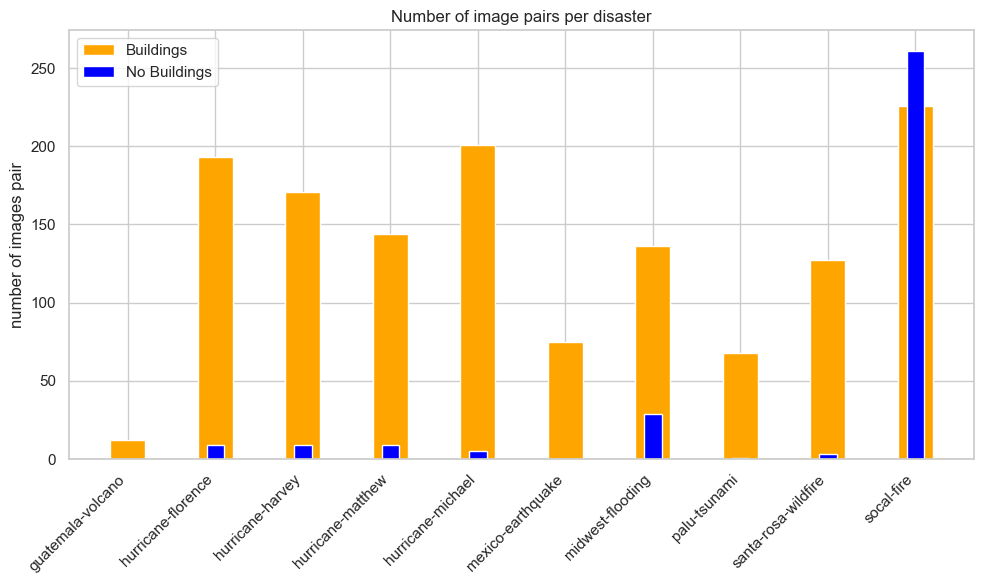

In [84]:
# Create a bar plot for number of images with and without building annotations, per disaster

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.4

# Create an array of x positions for the bars
x = np.arange(len(img_per_disaster_no_build.index))
#Bar plot for buildings
plt.bar(img_per_disaster_with_build.index, img_per_disaster_with_build.values, color='orange', label='Buildings',width=bar_width)

# Bar plot for images with no buildings
plt.bar(img_per_disaster_no_build.index, img_per_disaster_no_build.values, color='blue', align='center', label='No Buildings',width=bar_width/2)

# 
plt.xlabel('')
plt.ylabel('number of images pair')
plt.title('Number of image pairs per disaster')
plt.legend()
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [85]:
# all different damage classification labels we have
df['properties_subtype'].unique()

# what is nan?

array(['no-damage', 'un-classified', 'minor-damage', 'major-damage',
       'destroyed'], dtype=object)

In [86]:
# how many building per damage label?
buildings_per_label=df.groupby("properties_subtype")["metadata_id"].count()

# changing the order of labels
index_order = ['no-damage', 'minor-damage', 'major-damage', 'destroyed', 'un-classified']
new_buildings_per_label=buildings_per_label.reindex(index_order)

new_buildings_per_label


properties_subtype
no-damage        75028
minor-damage      8970
major-damage      8208
destroyed         7937
un-classified     1721
Name: metadata_id, dtype: int64

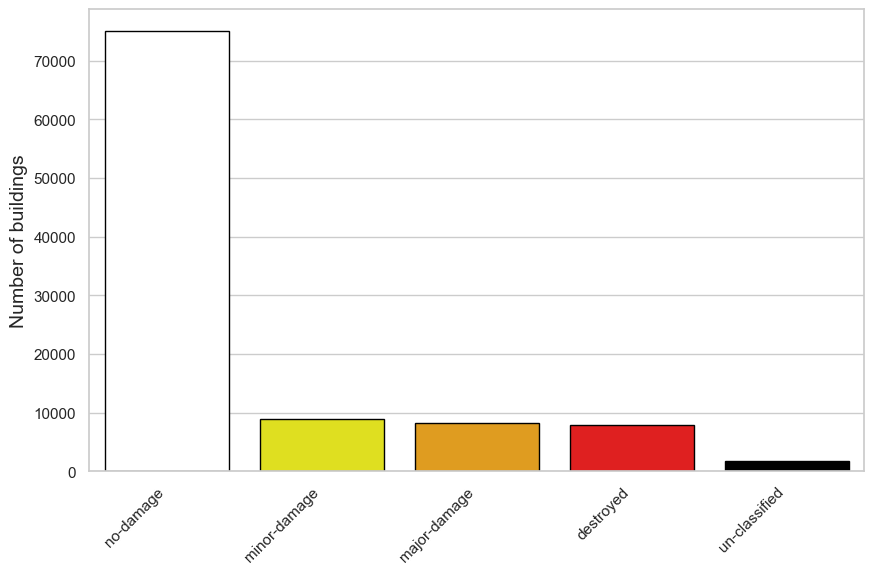

In [87]:
# plot number of buildings per damage label

colors = ["white", "yellow", "orange", "red","black"] 

#plt.rcParams['figure.facecolor'] = 'white'  
# Create a countplot using Seaborn
#sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=new_buildings_per_label.index,y=new_buildings_per_label, palette=colors)
for p in ax.patches:
    p.set_edgecolor("black")
# Customize the plot
plt.xlabel("", fontsize=14)
plt.ylabel("Number of buildings", fontsize=14)
#plt.title("Number of image pairs per disaster", fontsize=16)
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

In [88]:
# check how many different labels there are per image
unique_labels_per_image = df.groupby('metadata_id')['properties_subtype'].nunique()
num_labels = pd.DataFrame(unique_labels_per_image)
num_labels

,properties_subtype
metadata_id,
MjU0NjA0MA.pO84SnlRHej3cxvDsnh4Cf7a_Ck,1
MjU0NjA0Mw.tEbtkDyJqMufk-jEMOytA9W8UBY,5
MjU0NjA0NA.Lb2cseRqARezpehqHfBTkPYW4nA,2
MjU0NjA0Nw.Bf82eWT3M934rw6aCCN4ZODQduc,4
MjU0NjA0OA.Q7hHOsiZkZ87jsjCfqQ5DrlIaJk,5
...,...
MjUyNjkyNQ.PmIL1o_48g-c9IM4Zscx7lGXwHI,3
MjUyNjkzMA.meNbEwFYBs3FfYPbd5r6_nC1Y_k,2
MjUyNjkzMQ.-shG9K7s13mq_beIxftJ5VRQS6U,1


In [89]:
#how many different labels per one image (from 1 up to 5 in this dataset)
num_labels['properties_subtype'].unique()

array([1, 5, 2, 4, 3])

In [90]:
# how many images have more than 1 label --> 851 from 1353
num_labels.query('properties_subtype > 1').count()

properties_subtype    851
dtype: int64

In [91]:
# which disasters have more than 1 class label per image --all 6

# Group the DataFrame by 'metadata_id' and calculate the number of unique class labels per image
unique_labels_per_image = df.groupby('metadata_id')['properties_subtype'].nunique()

# Filter the DataFrame to include only images with more than one unique label
filtered_df = df[df['metadata_id'].isin(unique_labels_per_image[unique_labels_per_image > 1].index)]

# Get the unique types of disaster for the filtered images
unique_disaster_types = filtered_df['metadata_disaster_type'].unique()

print(unique_disaster_types)

['earthquake' 'wind' 'flooding' 'fire' 'tsunami' 'volcano']
